<a href="https://colab.research.google.com/github/RaniaPrastyka/Diagnostic-Data-Predictive-Model-Analytics./blob/main/Air_Quality_Forecasting_Linier_Regresion_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#loading dataset
df= pd.read_excel('AirQualityUCI.xlsx', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,2004-03-10 00:00:00,18:00:00,2.6,1360,150,11.881723,1045.5,166,1056.25,113,1692,1267.5,13.6,48.875001,0.757754
2,2004-03-10 00:00:00,19:00:00,2,1292.25,112,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.3,47.7,0.725487
3,2004-03-10 00:00:00,20:00:00,2.2,1402,88,8.997817,939.25,131,1140,114,1554.5,1074,11.9,53.975,0.750239
4,2004-03-10 00:00:00,21:00:00,2.2,1375.5,80,9.228796,948.25,172,1092,122,1583.75,1203.25,11,60,0.786713


In [ ]:
#defining headers(Capitalized)
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [ ]:
#Skiping Row1, Including 'col' i.e. Headers
df1=pd.read_excel('AirQualityUCI.xlsx',header=None,skiprows=1,names=col)
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [ ]:
#Defining col numbers
r=list(np.arange(len(col)))

In [ ]:
df1=pd.read_excel('AirQualityUCI.xlsx',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

In [ ]:
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [ ]:
#Getting Datatypes
df1.dtypes

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
dtype: object

In [ ]:
#We could see NaN values in tail
df1.tail(130)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9227,2005-03-30,05:00:00,0.5,900.75,-200,2.062928,588.75,122.0,933.00,69.9,1108.50,753.75,10.200,77.875000,0.969173
9228,2005-03-30,06:00:00,0.8,947.50,-200,3.848126,702.25,145.7,801.00,78.3,1164.25,818.25,10.950,73.100000,0.955366
9229,2005-03-30,07:00:00,2.3,1249.50,-200,12.550508,1068.50,397.2,532.00,105.7,1457.00,1202.00,10.650,73.650000,0.943928
9230,2005-03-30,08:00:00,2.9,1262.50,-200,14.673257,1138.25,371.2,502.75,116.7,1533.00,1295.50,12.125,67.349999,0.949850
9231,2005-03-30,09:00:00,3.1,1318.50,-200,15.476326,1163.50,454.3,488.50,144.4,1543.00,1417.75,15.075,58.624999,0.998221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
#droping end rows with NaN values
df1.dropna(how='all',inplace=True)

In [ ]:
df1.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9347,2005-04-04,05:00:00,0.5,888.25,-200,1.307608,528.00,76.5,1076.50,53.1,987.00,577.50,10.400000,59.875000,0.754964
9348,2005-04-04,06:00:00,1.1,1030.50,-200,4.359341,730.25,182.2,760.00,93.0,1129.00,905.00,9.550000,63.150000,0.753129
9349,2005-04-04,07:00:00,4.0,1383.50,-200,17.364240,1220.75,593.7,470.25,154.6,1600.00,1457.25,9.675000,61.924999,0.744608
9350,2005-04-04,08:00:00,5.0,1446.00,-200,22.393233,1361.50,586.2,414.75,173.6,1776.50,1704.50,13.550000,48.875000,0.755337
9351,2005-04-04,09:00:00,3.9,1296.50,-200,13.552393,1102.00,522.7,506.75,186.5,1375.25,1582.50,18.150001,36.275001,0.748652
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850000,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325000,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900000,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325000,13.550000,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500000,13.125000,0.502804


In [ ]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
df1.shape

(9357, 15)

## **CLEANING DATA**

In [ ]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


In [ ]:
#Defining Month from DATE column
df1['DATE']=pd.to_datetime(df1.DATE, format='%d-%m-%Y')
df1['MONTH']= df1['DATE'].dt.month
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,3
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772,3
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312,3
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238,3
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819,3
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657,3


In [ ]:
df1['HOUR'] = df1['TIME'].apply(lambda x: int(str(x).split(':')[0]))
df1['HOUR'].head(10)

0    18
1    19
2    20
3    21
4    22
5    23
6     0
7     1
8     2
9     3
Name: HOUR, dtype: int64

In [ ]:
df1.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3,18
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3,19
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3,20
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3,21
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3,22


## MELIHAT KORELASI ANTAR VARIABEL

<ipython-input-23-db5d2c029cff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True, linewidths=.4)


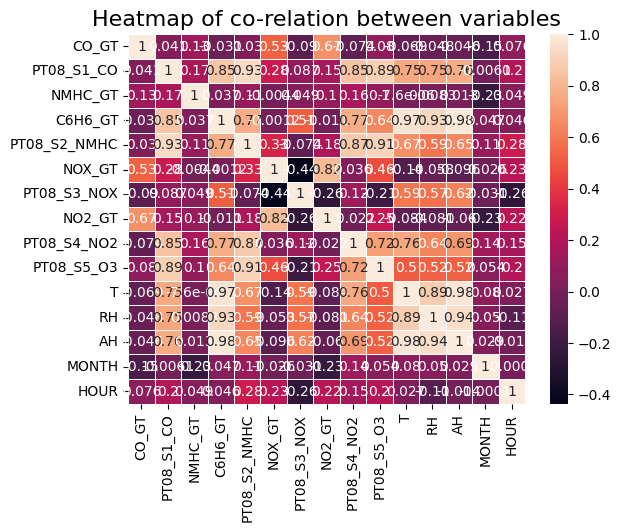

In [ ]:
sns.heatmap(df1.corr(),annot=True, linewidths=.4)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()


# Memahami Linearitas antara Kelembaban Relatif (RH) & variabel lainnya

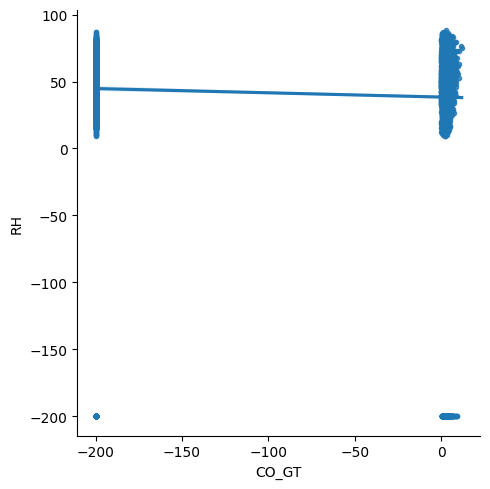

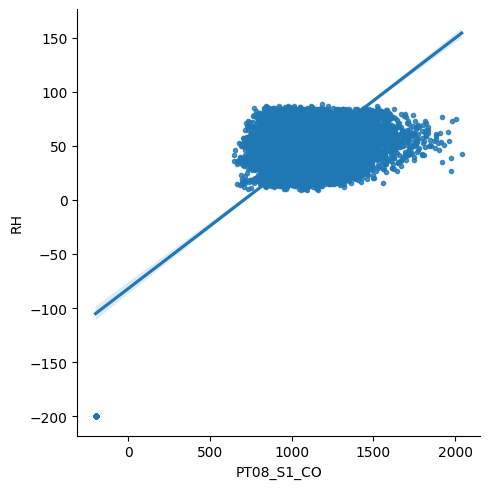

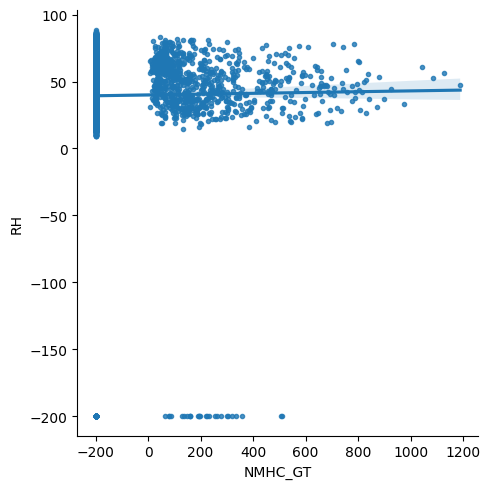

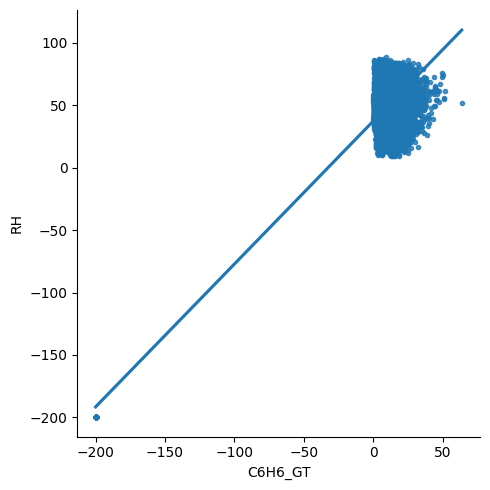

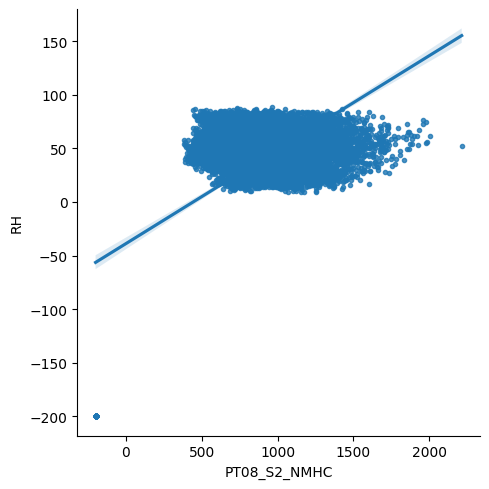

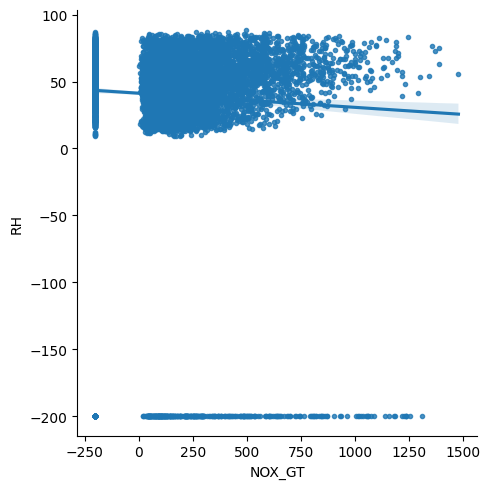

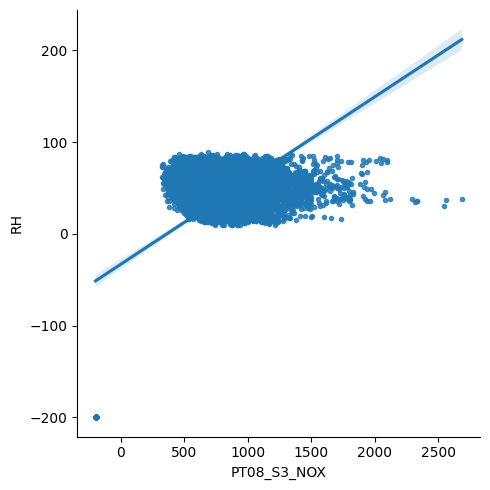

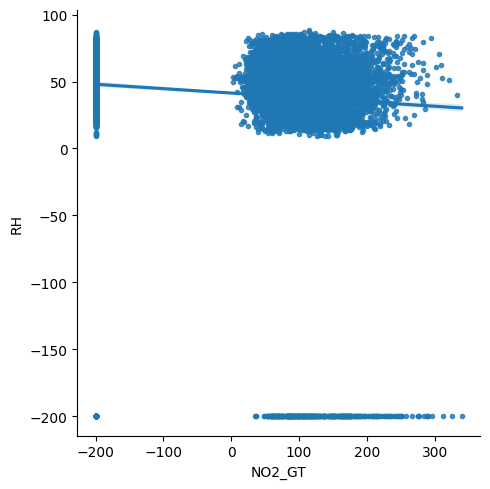

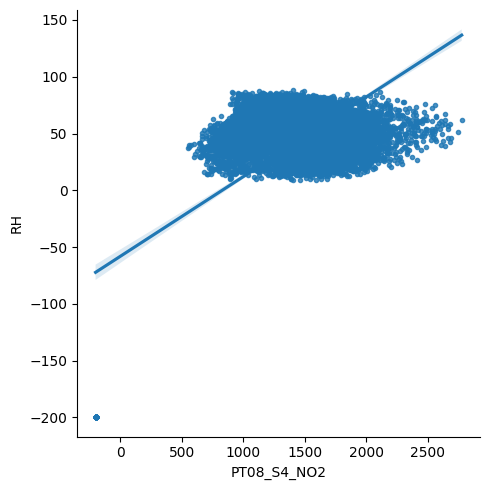

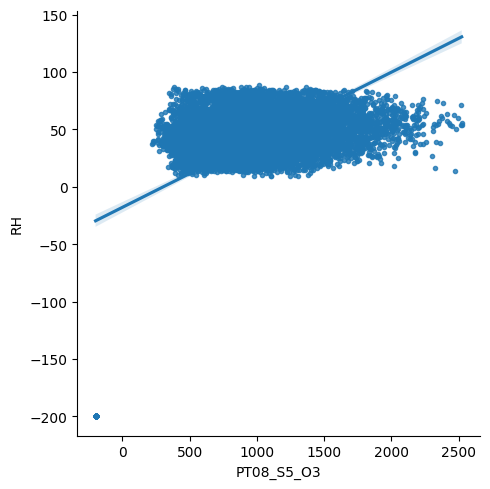

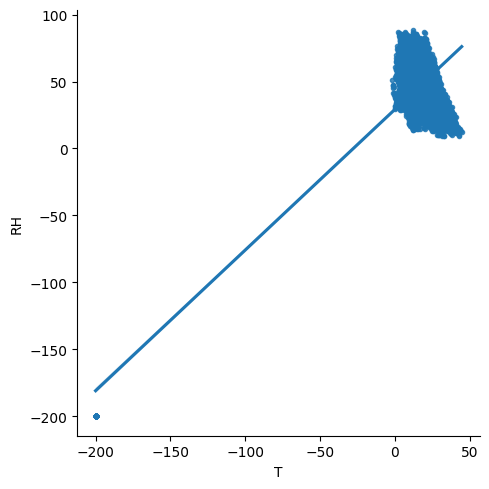

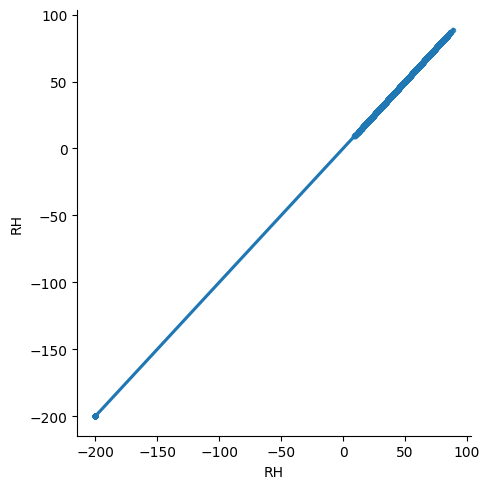

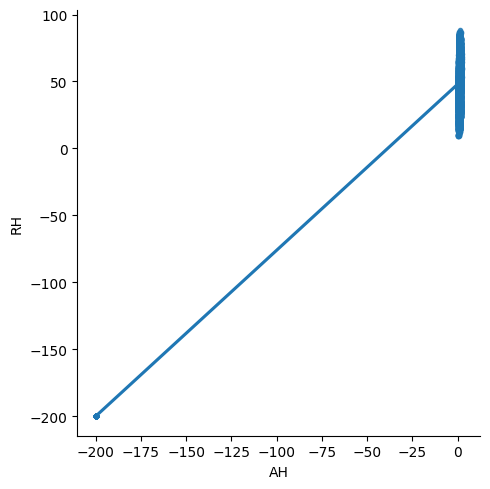

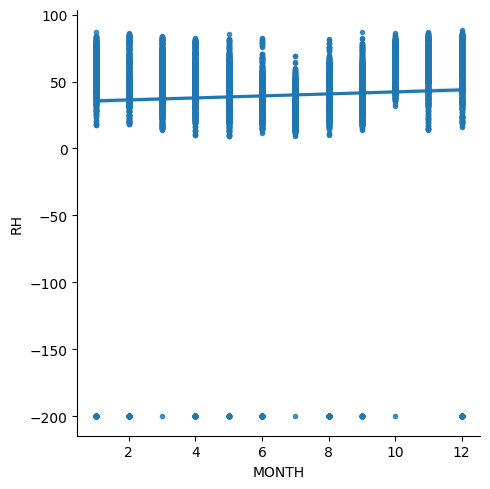

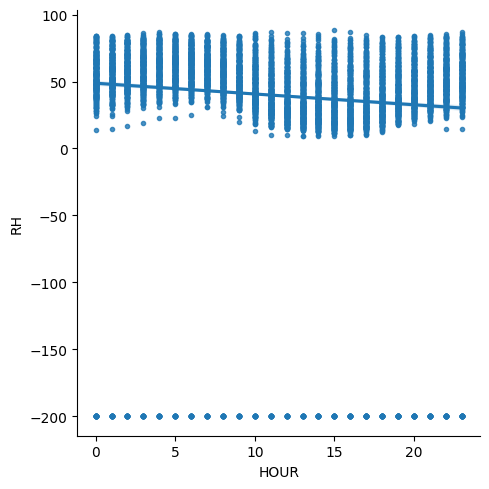

In [ ]:
col1=df1.columns.tolist()[2:]
for i in df1.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df1,markers='.')

## **LINIER REGRESION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
X=df1[col1].drop('RH',1)
Y=df1['RH']
SScaler=StandardScaler()
Xsd=SScaler.fit_transform(X)    #applying stardardisation
X.head()

<ipython-input-26-d1d581efb5dd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1[col1].drop('RH',1)


,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,MONTH,HOUR
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,3,18
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,3,19
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,3,20
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,3,21
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,3,22


In [ ]:
Y.head()

0    48.875001
1    47.700000
2    53.975000
3    60.000000
4    59.575001
Name: RH, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(Xsd,Y,test_size=0.4, random_state=3)

In [ ]:
#Data-Size
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

Training Data Size: (5614, 14)
Test Data Size: (3743, 14)


In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Intercept:',model.intercept_)

Intercept: 39.61106870705998


In [ ]:
prediction = model.predict(X_test)
prediction

array([67.22532777, 71.95452417, 49.44751166, ..., 28.03357434,
       69.53287276, 61.63363935])

In [ ]:
y_test

6432     71.724998
1452     67.449999
7516     54.974999
4856     53.424999
1075     32.066666
           ...    
7204   -200.000000
1759     56.200001
4868     28.525000
6328     68.475001
4113     64.625002
Name: RH, Length: 3743, dtype: float64

In [ ]:
print("Co-efficient:")
list(zip(X.columns,model.coef_))

Co-efficient:


[('CO_GT', 0.15822545750268496),
 ('PT08_S1_CO', 7.62183325841334),
 ('NMHC_GT', -1.9208706945580962),
 ('C6H6_GT', -35.4947888477664),
 ('PT08_S2_NMHC', -19.133116022665888),
 ('NOX_GT', 4.260524279256449),
 ('PT08_S3_NOX', -6.6746138484107815),
 ('NO2_GT', -3.056701720570494),
 ('PT08_S4_NO2', 25.73926812578689),
 ('PT08_S5_O3', -1.3993904735697222),
 ('T', -91.48589144140205),
 ('AH', 166.72840236099822),
 ('MONTH', 4.009936110445758),
 ('HOUR', -0.7385360359519286)]

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rs)
print("\n")
print("Therefore by applying Linear Regression we can predict RH using all the features together with RSME=",rs)

6.971372753947364


Therefore by applying Linear Regression we can predict RH using all the features together with RSME= 6.971372753947364


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [ ]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_y = lab_enc.fit_transform(y_train)

In [ ]:
model1.fit(X_train,training_y)

LogisticRegression()

In [ ]:
prediction1=model1.predict(X_test)
prediction1

array([1810, 1645, 1497, ..., 1776, 3411, 2869])

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs1=np.sqrt(metrics.mean_squared_error(y_test,prediction1))
print(rs1)
print("\n")
print("Therefore by applying Logistic Regression we can predict RH using all the features together with RSME=",rs1)

1874.3410525361783


Therefore by applying Logistic Regression we can predict RH using all the features together with RSME= 1874.3410525361783


## **DECISION TREE REGRESION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
prediction2=model2.predict(X_test)
prediction2

array([75.17500114, 68.        , 53.875     , ..., 27.89999962,
       67.60000038, 62.30000019])

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs2=np.sqrt(metrics.mean_squared_error(y_test,prediction2))
print(rs2)
print("\n")
print("Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME=",rs2)

1.380210329925694


Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME= 1.380210329925694


## **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()

In [ ]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
prediction3=model3.predict(X_test)
prediction3

array([72.82674999, 67.33524997, 54.04125006, ..., 27.90249991,
       68.16800001, 63.62550023])

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs3=np.sqrt(metrics.mean_squared_error(y_test,prediction3))
print(rs3)
print("\n")
print("Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME=",rs3)

0.696116687199154


Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME= 0.696116687199154


## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
model4=SVR()

In [ ]:
model4.fit(X_train,y_train)

SVR()

In [ ]:
prediction4=model4.predict(X_test)
prediction4

array([63.56633616, 54.34796405, 48.11460876, ..., 36.59582319,
       61.38629866, 56.67579338])

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs4=np.sqrt(metrics.mean_squared_error(y_test,prediction4))
print(rs4)
print("\n")
print("Therefore by applying Support Vector Machine we can predict RH using all the features together with RSME=",rs4)

24.502591458122172


Therefore by applying Support Vector Machine we can predict RH using all the features together with RSME= 24.502591458122172


# **KESIMPULAN**

In [ ]:
print("We got following RMSE by applying different regression:\n\n")
print("Linear Regression=",rs,"\n")
print("Logistic Regression=",rs1,"\n")
print("Decision Tree Regression=",rs2,"\n")
print("Random Forest Regression=",rs3,"\n")
print("Support Vector Machine Regression=",rs4,"\n")

We got following RMSE by applying different regression:


Linear Regression= 6.971372753947364 

Logistic Regression= 1874.3410525361783 

Decision Tree Regression= 1.380210329925694 

Random Forest Regression= 0.6930164302077809 

Support Vector Machine Regression= 24.502591458122172 



In [ ]:
print("So we acheive best results from:")
dict={"Linear Regression": rs,"Logistic Regression": rs1,"Decision Tree Regression": rs2,"Random Forest Regression": rs3, "Support Vector Machine Regression":rs4   }
res =  [key for key in dict if
        all(dict[temp] >= dict[key]
        for temp in dict)]
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)

So we acheive best results from:
{'Random Forest Regression': 0.6930164302077809}
